In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Image Recognition
import cv2 

from PIL import Image
import tensorflow as tf

#like a random state 
tf.random.set_seed(3)

from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



Loading the MNIST data from keras.datsets

In [47]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [48]:
type(x_train)

numpy.ndarray

In [49]:
# Shape of Nummpy array

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

#600000 --> no of images 
# dimensioanal 28 28 pixels..
# it is gray scale images..

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data =60000 images 


Test data=10000 images 


Image Dimensional --> 28 x 28



Gray Scale Images --> 1 Colored Channel

In [50]:
# Printing the 10th image..

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [51]:
print(x_train[10].shape)

(28, 28)


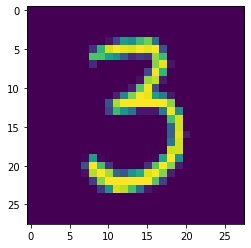

3


In [52]:
# display the image 

plt.imshow(x_train[50])
plt.show()

# printing the corresponding label

print(y_train[50])

In [53]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [54]:
#Unique Values in y_train
print(np.unique(y_train))

#Unique Values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can also apply one hot encoding...

All the images have the same dimensioanl in this dataset, if not, we have to resize the image to a common dimensional..

In [55]:
#Scaling the values..
x_train=x_train/255
x_test=x_test/255

In [56]:
#0/255 --> 0
#255/255 -->1
# between 0 and 1

In [57]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Bulding the NeuralNetwork

In [58]:
# Setting the layers of the Neural Network

model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(10,activation='sigmoid')])

In [59]:
# Compiling the NeuralNetwork

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
# Training the NeuralNetwork

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0687 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0605 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0508 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

Training data accuracy=98.9

In [61]:
# Accuracy on test data

loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9735
0.9735000133514404


Test data accuracy=97.1

In [62]:
print(x_test.shape)

(10000, 28, 28)


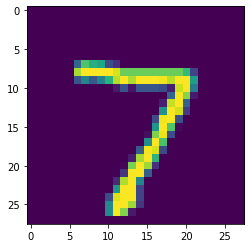

In [63]:
# First data point in x_test

plt.imshow(x_test[0])
plt.show()

In [64]:
print(y_test[0])

7


In [65]:
y_pred=model.predict(x_test)

In [66]:
print(y_pred.shape)

(10000, 10)


In [67]:
print(y_pred[0])

[4.8886836e-03 7.1951461e-01 7.9697365e-01 4.0807933e-01 8.1527680e-05
 1.4248490e-04 2.0205714e-08 9.9999958e-01 1.1636019e-03 1.7458040e-01]


**model.predict() gives the prediction probability of each class for that data point **

In [68]:
# converting the prediction probabilities to class label

label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [69]:
# converting the prediction probabilities to class label for test data points..

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels

y_pred_labels -->predicted labels

In [70]:
print(y_pred)

[[4.8886836e-03 7.1951461e-01 7.9697365e-01 ... 9.9999958e-01
  1.1636019e-03 1.7458040e-01]
 [1.1718571e-03 9.9694324e-01 1.0000000e+00 ... 8.0850340e-09
  9.8665261e-01 1.1991884e-10]
 [6.7077941e-05 9.9956810e-01 9.0594292e-03 ... 2.5365800e-02
  4.2554000e-01 7.0720911e-04]
 ...
 [5.6407549e-07 6.1357746e-06 3.6180019e-04 ... 1.9030583e-01
  1.8332601e-03 7.1246803e-01]
 [6.2883082e-05 1.5085936e-04 4.5340061e-03 ... 2.6763290e-02
  9.9096739e-01 6.7612529e-04]
 [4.1255951e-03 5.0494075e-03 9.9168688e-02 ... 2.3025737e-07
  1.9985437e-04 9.0297474e-13]]


Building the Confusion matrix

In [71]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [72]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    1    0    1    1    2    3    1]
 [   0 1123    1    2    0    2    2    1    4    0]
 [   2    0 1007    3    4    0    3    4    9    0]
 [   0    0    7  977    0   12    0    3    5    6]
 [   0    1    4    0  963    0    8    2    1    3]
 [   2    0    0    6    2  872    5    1    3    1]
 [   4    3    0    0    5    4  938    0    4    0]
 [   1    7   12    2    2    0    0  998    3    3]
 [   4    0    4    6    6    7    1    5  939    2]
 [   3    4    1    7   18    7    2    8   11  948]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predictes labels')

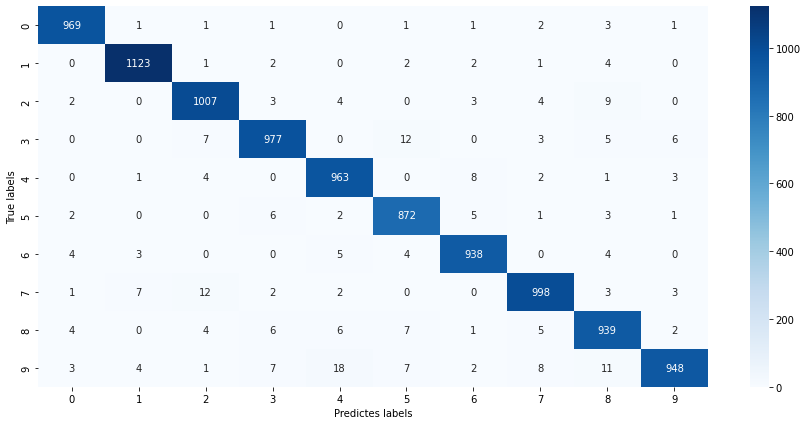

In [73]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predictes labels')

Building the predictive System

In [74]:
input_image_path='../input/mnist-digit/MNIST_digit.png'

input_image=cv2.imread(input_image_path)


In [75]:
type(input_image)

numpy.ndarray

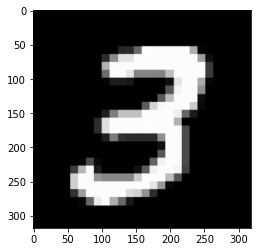

In [76]:
plt.imshow(input_image)

In [77]:
input_image.shape

(318, 318, 3)

In [78]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [79]:
grayscale.shape

(318, 318)

In [80]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [81]:
input_image_resize.shape

(28, 28)

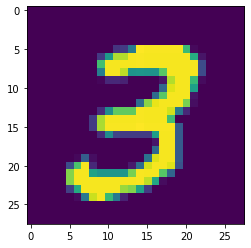

In [82]:
plt.imshow(input_image_resize)

In [83]:
input_image_resize=input_image_resize/255

In [84]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [85]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

[[6.1865457e-10 3.8423699e-01 2.3032725e-03 1.0000000e+00 3.5238984e-10
  2.3436892e-01 8.6107533e-14 9.9328160e-04 9.8546088e-01 3.5684371e-01]]


In [86]:
input_pred_label=np.argmax(input_prediction)

In [87]:
print(input_pred_label)

3


predictive System

path of the image to be predicted:  ../input/mnist-digit/MNIST_digit.png


The HandWritten Digit is recognized as  3


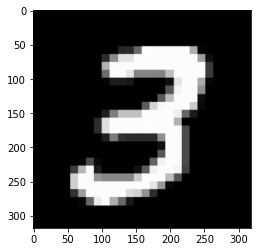

In [88]:
input_image_path=input('path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
print('The HandWritten Digit is recognized as ',input_pred_label)